In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Create a random dataset
n = 300
study_hours = np.random.normal(5, 1.5, n).round(2)
teaching_method = np.random.choice(['Method A', 'Method B', 'Method C'], n)
IQ = np.random.normal(100, 15, n).round(2)
age = np.random.randint(18, 22, n)
test_score = (0.5 * study_hours + 0.3 * IQ + 0.2 * age + 
              np.random.normal(0, 10, n)).round(2)

# Create DataFrame
df = pd.DataFrame({
    'study_hours': study_hours,
    'teaching_method': teaching_method,
    'IQ': IQ,
    'age': age,
    'test_score': test_score
})

# Display the first few rows of the dataset
df.head()

,study_hours,teaching_method,IQ,age,test_score
0,5.75,Method A,95.78,21,28.76
1,4.79,Method B,75.03,20,21.87
2,5.97,Method A,99.91,19,60.33
3,7.28,Method A,106.05,18,48.43
4,4.65,Method C,116.84,18,32.58


In [3]:
# Perform Linear Regression
X = df[['study_hours', 'IQ', 'age']]
y = df['test_score']
X = sm.add_constant(X)  # Add an intercept to the model

model_lr = sm.OLS(y, X).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     21.62
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.09e-12
Time:                        21:43:49   Log-Likelihood:                -1100.9
No. Observations:                 300   AIC:                             2210.
Df Residuals:                     296   BIC:                             2225.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2116     10.732     -0.206      

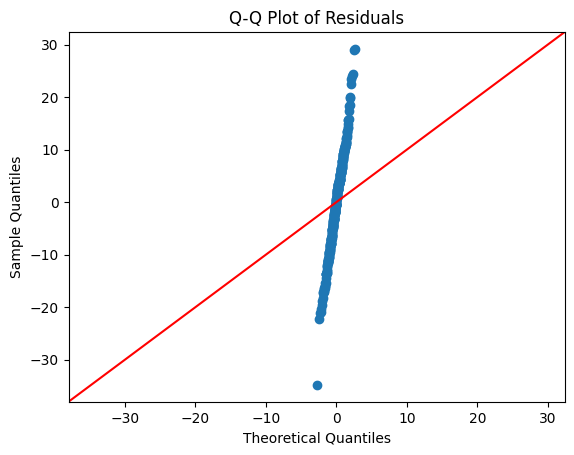

In [4]:
# Q-Q plot for normality check
sm.qqplot(model_lr.resid, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

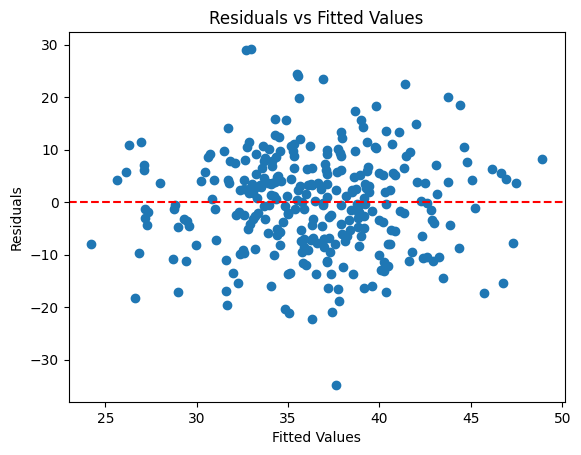

In [5]:
# Scatter plot of residuals vs fitted values
plt.scatter(model_lr.fittedvalues, model_lr.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

                            OLS Regression Results                            
Dep. Variable:         log_test_score   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.91e-09
Time:                        21:43:50   Log-Likelihood:                -123.80
No. Observations:                 300   AIC:                             255.6
Df Residuals:                     296   BIC:                             270.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1138      0.413      5.116      

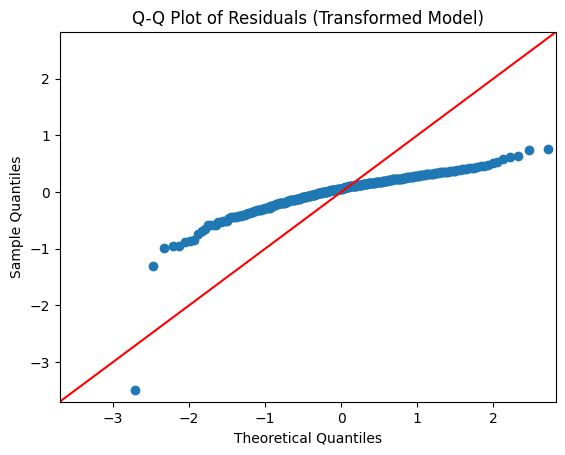

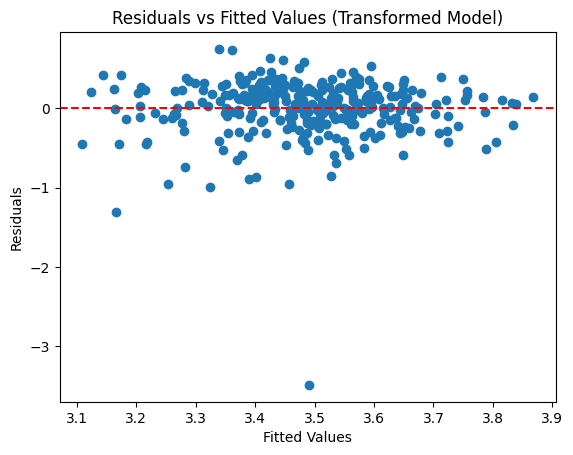

In [6]:
# Apply log transformation to the dependent variable if necessary
df['log_test_score'] = np.log(df['test_score'] - df['test_score'].min() + 1)

# Re-run linear regression with transformed data
y_transformed = df['log_test_score']
model_lr_transformed = sm.OLS(y_transformed, X).fit()
print(model_lr_transformed.summary())

# Q-Q plot for transformed model
sm.qqplot(model_lr_transformed.resid, line ='45')
plt.title('Q-Q Plot of Residuals (Transformed Model)')
plt.show()

# Scatter plot of residuals vs fitted values for transformed model
plt.scatter(model_lr_transformed.fittedvalues, model_lr_transformed.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Transformed Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()